# Lasso and Slope estimators

Neste projeto iremos implementar métodos iterativos para achar a solução do seguinte estimador de mínimos quadrados regularizado:

$$
\min_{b\in\mathbb{R}^{p\times1}}f(b)=\frac{1}{2n}\sum_{i=1}^n(y_i-x_i^\top b)^2+\lambda\Vert b\Vert_\sharp, 
$$

onde $(y_1,x_1), \ldots, (y_n,x_n)$ é uma amostra de labels/features em $\mathbb{R}\times\mathbb{R}^p$. Àcima, $\lambda>0$ é um hyper-parâmetro positivo e 

$$
\Vert b\Vert_\sharp := \sum_{j=1}^p\omega[j]b_\sharp[j],
$$

é a *norma Slope* do vetor $b$, onde $\omega\in\mathbb{R}^{p\times1}$ é um vetor de coordenadas positivas não-decrescente e $b_\sharp[1]\ge\ldots,b_\sharp[p]$ simboliza as coordenadas de $b$ postas em ordem não-crescente.  Precisamente, iremos considerar duas opcões:

1. $\omega[j]\equiv1$, 
2. $\omega[j]:=\sqrt{\log(2p/j)}$.

<div hidden>
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\argmin}{argmin}$
</div>

# Soft-Thresholding e ``sortedL1Prox()``

Recorde que o passo de iteração do método gradiente proximal é calcular o *operador proximal* da norma $\lambda\Vert\cdot\Vert_\sharp$:

$$
P(v,\lambda\omega)\in\argmin_{b\in\mathbb{R}^{p\times1}}\left\{
\frac{1}{2}\Vert v - b\Vert_2^2 + \lambda\Vert b\Vert_\sharp
\right\}.
$$

1. Suponha primeiro que $\omega[j]\equiv1$ então $P(v,\lambda\omega)$ tem fórmula explicíta. Dados $\gamma\in\mathbb{R}$, defina

$$
S(\gamma,\lambda):=(\gamma)\cdot\max\{\gamma-\lambda,0\}.
$$

Àcima, $(\gamma)$ é o sinal de $\gamma$. Então, para um vetor $v\in\mathbb{R}^{p\times1}$,

$$
P(v,\lambda\omega)=[S(v[1],\lambda) \ldots S(v[p],\lambda)]^\top
$$

2. No caso do item 2, não existe uma fórmula explícita para $P(v,\lambda\omega)$. Mas podemos usar a função ``sortedL1Prox()`` do pacote ``SLOPE`` escrito em R. Veja [SLOPE](https://cran.r-project.org/web/packages/SLOPE/index.html), assim como introduções em [An intro to SLOPE](https://cran.r-project.org/web/packages/SLOPE/vignettes/introduction.html) e [Proximal Operators](https://cran.r-project.org/web/packages/SLOPE/vignettes/prox-algs.html). Em nossa notação, ``sortedL1Prox(v,lambda*omega)`` computa $P(v,\lambda\omega)$ para a sequência $\omega$.

Antes precisaremos criar um código para boter ler a função `sortedL1Prox()` em Python. Para tanto, precisaremos da biblioteca `rpy2`. Para instalá-lo chame `pip install rpy2` no terminal base de sua maquina. Em R, o pacote ``SLOPE`` precisa estar instalado e fazer o chamado ``library(SLOPE)``.

In [1]:
import matplotlib
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import numpy.linalg as la

from rpy2 import robjects
from rpy2.robjects.packages import importr

In [2]:
def sortedL1Prox(v,seq):
    '''
    Função que toma (v,seq) e retorna P(v,seq).
    '''
    # R representation in Python of (v,seq):
    r_var = robjects.vectors.FloatVector(np.hstack((v,seq)))
    # Python function to call R function sortedL1Prox()
    func = robjects.r(
    '''
    library(SLOPE)
    function(v,seq) sortedL1Prox(v,seq)
    '''
    )
    # Calling Python function sortedL1Prox using R representation r_var:
    return np.asarray(func(r_var[0:len(r_var)//2], r_var[len(r_var)//2:]))

In [3]:
#Exemplo:
v = 90.0*np.arange(10)
omega = np.ones(10)
lambd = 2.5
seq = lambd*omega
v.shape, omega.shape

((10,), (10,))

In [4]:
sortedL1Prox(v,seq)

array([  0. ,  87.5, 177.5, 267.5, 357.5, 447.5, 537.5, 627.5, 717.5,
       807.5])

# Exercício 1: Gerando dados

1. Construa uma função ``data_genP(p,s,b_mag)`` que toma $p$, $s\in[p]$ e número positivo ``b_mag`` e retorna vetor $p$-dimensional cujas $s$-ézimas primeiras coordenadas são $b_{\text{mag}}$ e as outras são zero.

In [5]:
#Escreva código aqui
def data_genP(p:int, s:int, b_mag:float) -> np.ndarray:
    x = np.zeros(p)
    x[0: s] = b_mag
    return x.reshape(-1,1)

In [6]:
#Exemplo:
p=100
s=10
b_mag=2
b_true = data_genP(p,s,b_mag)
b_true

array([[2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

2. Construa uma função ``data_genXe(n,p,b_true,sd)`` que toma $n$, $p$, $b_{\text{true}}$ e um número positivo ``sd`` e constrói uma matriz de dados ``X`` $n\times p$ cujas linhas são vetores $x_i^\top$ normais padrão $p$-dimensionais independentes e o vetor ``y`` de dimensão $n$ cujas coordenadas satisfazem

$$
y_i = x_i^\top b_{\text{true}} + \text{sd}\cdot\epsilon_i,
$$
onde $\{\epsilon_i\}_{i=1}^n$ é uma sequência iid de normais padrão. 

In [7]:
#Escreva código aqui
def data_genXe(n:int, p:int, b_true:np.ndarray, sd:float) -> list[np.ndarray]:
    X = np.random.normal(loc=0, scale=1, size=(n, p))

    y = X @ b_true + sd * np.random.normal(loc=0, scale=1, size=n).reshape(-1,1)

    return X, y

In [8]:
#Exemplo:
sd = 0.1
n = 5

b_true = data_genP(p,s,b_mag)
X,y = data_genXe(n,p,b_true,sd)
X,y

(array([[ 3.58540608e-01,  7.98654887e-02, -1.36937383e+00,
         -8.24340889e-01,  2.26043661e-01, -5.45756258e-01,
          1.32025823e+00, -1.41305563e-01, -9.27685370e-01,
          9.18844942e-01, -1.54226420e+00, -1.10365439e+00,
          2.17261225e+00, -5.38344001e-01, -1.61714641e-01,
         -6.76131323e-01, -4.66943469e-01,  1.11872539e+00,
          2.30046781e+00,  1.35637706e+00,  1.43669775e+00,
         -4.70340324e-01,  3.24345378e-01,  1.85146891e+00,
         -8.10912853e-01, -4.66595660e-01,  1.62363854e-01,
         -4.80198393e-02, -1.26861652e+00, -3.56590024e-01,
          4.70269367e-01, -8.85248489e-01, -7.31494171e-04,
         -5.06938124e-01, -4.77036223e-01, -6.70256623e-01,
          3.85459828e-01, -1.37127955e-01, -8.11288129e-01,
         -4.27662922e-01,  1.42780387e+00, -1.59756092e+00,
         -5.57465955e-01,  1.05589430e+00,  3.09757969e-01,
         -1.47128522e+00,  1.20216180e+00, -6.63103059e-01,
          1.95755460e-02, -4.10634900e-0

# Exercício 2: 

Vamos usar o método gradiente proximal para resolver o problema àcima:

\begin{align*}
w_{k+1} &:= b_k - \frac{1}{L}\nabla f(b_k),\\
b_{k+1} &:= P\left(w_{k+1},\frac{\lambda}{L}\omega\right).
\end{align*}

Construa uma função ``linear_reg(n,p,SlopeB,X,y,L,lambd,b0,t_final)`` onde, $1/L$ é o passo, ``lambd`` ($=\lambda$) é o fator de penalização, ``b0`` é o ponto inicial, a variável ``t_final`` é o número de iterações e:

1. a variável Booleana ``SlopeB`` vale ``False`` se a sequêndia $\omega[j]\equiv1$.
2. a variável Booleana ``SlopeB`` vale ``True`` se $\omega[j]=\sqrt{\log(2p/j)}$. 

A função deve retornar a sequência $k\mapsto\frac{1}{2n}\sum_{i=1}^n(y_i-x_i^\top b_k)^2$ e o último iterado $b_{\text{t final}}$. Use penalização

$$
\lambda = \text{sd}\sqrt{\frac{\log p}{n}}, 
$$

e passo $1/L$ com

$$
L = A\lambda_{\max}\left(\frac{X^\top X}{n}\right),
$$ 
para algum ajuste fino $A>0$. 

In [9]:
#Escreva código aqui
def linear_reg(n:int, p:int, SlopeB:bool, X:np.ndarray, y:np.ndarray, L:float, lambd:float, b0:np.ndarray, t_final:int) -> list[list[float], np.ndarray]:
    
    omega = np.ones(p)
    if SlopeB:
        for j in range(1, p + 1):
            omega[j-1] = np.sqrt(np.log(2 * p / j))

    b = b0.reshape(-1,1)
    loss_history = list()

    for each_epoch in range(t_final):
        grad = -(1/n) * X.T @ (y - X @ b) + lambd * omega
        
        w = b - (1/L) * grad
        w = np.array([i[0] for i in w.tolist()])

        b = sortedL1Prox(w, (lambd/L) * omega).reshape(-1, 1)

        loss = (1/(2*n)) * la.norm(y - X @ b)**2
        loss_history.append(loss)

    return loss_history, b

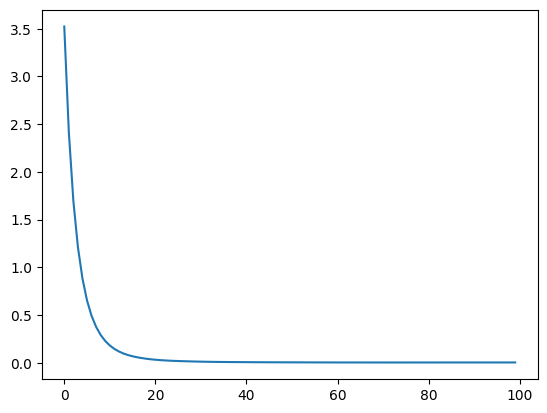

In [10]:
#Exemplo:
b0 = np.asmatrix(np.zeros(p)).T
t_final = 100
SlopeB = True
A = 4
L = A*np.max(la.eigvalsh(X.T @ X / X.shape[0]))
lambd = sd*np.sqrt(np.log(p)/n)      

f1 = linear_reg(n,p,SlopeB,X,y,L,lambd,b0,t_final)
plt.plot(f1[0])
plt.show()

# Pergunta: 

Varie $A$. O que acontece se $A$ for muito pequeno? Alguma intuição?

Quando $A$ é muito pequeno, ocorre uma convergência à 0 mais veloz, o que se assemelha ao sentido de learning rate, ou, taxa de aprendizado, onde, quando maior a taxa, maiores as atualizações do gradiente, levando a saltos "maiores" das atualizações de pesos, deste modo, como $A$ é inversamente proporcional ao peso que o gradiente terá na atualização de pesos, quando $A$ é muito pequeno, o gradiente dará saltos "maiores", assim, convergindo mais rapidamente para uma perda menor, entretanto, isto pode dificultar para o gradiente convergir para o mínimo global, ficando preso em mínimos locais ou não conseguindo uma boa convergência de saltos pequenos para encontrar o mínimo global. Deste modo, mesmo que um $A$ menor diminua o tanto de atualizações necessárias para um bom resultado, pode influenciar na função não convergir para um mínimo global ótimo.

# Exercício 3: 

Agora, vamos usar o método gradiente proximal acelerado: iniciando de `b0=z0` e $t_0=1$:

\begin{align*}
z_{k+1}&:= P\left(
b_k - (1/L)\nabla f(b_k), \frac{\lambda}{L}\omega
\right),\\
t_{k+1} &:= \frac{1+\sqrt{1+4t_k^2}}{2},\\
b_{k+1} &:= z_{k+1} + \frac{t_{k}-1}{t_{k+1}}(z_{k+1} - z_{k}).
\end{align*}

Construa uma função ``linear_reg_acc(n,p,SlopeB,X,y,L,lambd,b0,t_final)`` onde, $1/L$ é o passo, ``lambd`` ($=\lambda$) é o fator de penalização, ``b0`` é o ponto inicial, a variável ``t_final`` é o número de iterações e:

1. a variável Booleana ``SlopeB`` vale ``False`` se a sequêndia $\omega[j]\equiv1$.
2. a variável Booleana ``SlopeB`` vale ``True`` se $\omega[j]=\sqrt{\log(2p/j)}$. 

A função deve retornar a sequência $k\mapsto\frac{1}{2n}\sum_{i=1}^n(y_i-x_i^\top b_k)^2$ e o último iterado $b_{\text{t_final}}$. Use penalização

$$
\lambda = \text{sd}\sqrt{\frac{\log p}{n}}.
$$

In [11]:
#Escreva código aqui
def linear_reg_acc(n:int, p:int, SlopeB:bool, X:np.ndarray, y:np.ndarray, L:float, lambd:float, b0:np.ndarray, t_final:int) -> list[list[float], np.ndarray]:

    omega = np.ones(p)
    if SlopeB:
        for j in range(1, p + 1):
            omega[j-1] = np.sqrt(np.log(2 * p / j))

    z_k = b0.reshape(-1,1)
    b = b0.reshape(-1,1)
    t_k = 1
    loss_history = list()

    for each_epoch in range(t_final):
        grad = -(1/n) * X.T @ (y - X @ b) + lambd * omega
        
        w = b - (1/L) * grad
        w = np.array([i[0] for i in w.tolist()])

        z_kn = sortedL1Prox(w, (lambd/L) * omega).reshape(-1, 1)

        t_kn = (1 + np.sqrt(1 + 4 * t_k**2))/2

        b = z_kn + ((t_k - 1)/t_kn) * (z_kn - z_k)

        loss = (1/(2*n)) * la.norm(y - X @ b)**2
        loss_history.append(loss)

        z_k = z_kn
        t_k = t_kn

    return loss_history, b

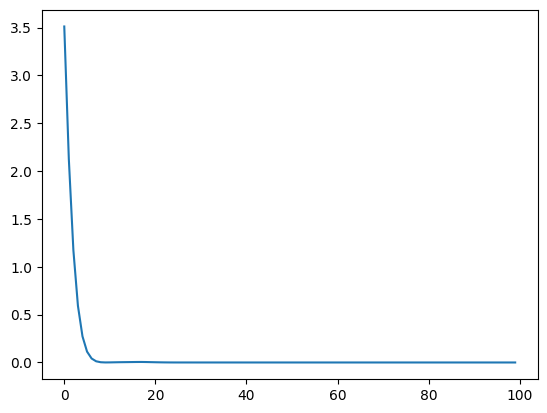

In [12]:
#Exemplo:
b0 = np.asmatrix(np.zeros(p)).T
t_final = 100
SlopeB = False
A = 4
L = A * np.max(la.eigvalsh(X.T @ X / X.shape[0]))
lambd = sd*np.sqrt(np.log(p)/n)      

f2 = linear_reg_acc(n,p,SlopeB,X,y,L,lambd,b0,t_final)
plt.plot(f2[0])

# Exercício 4: 

Implemente num mesmo gráfico os erros $k\mapsto\frac{1}{2n}\sum_{i=1}^n(y_i-x_i^\top b_k)^2$ de cada método em função no número de iterações.

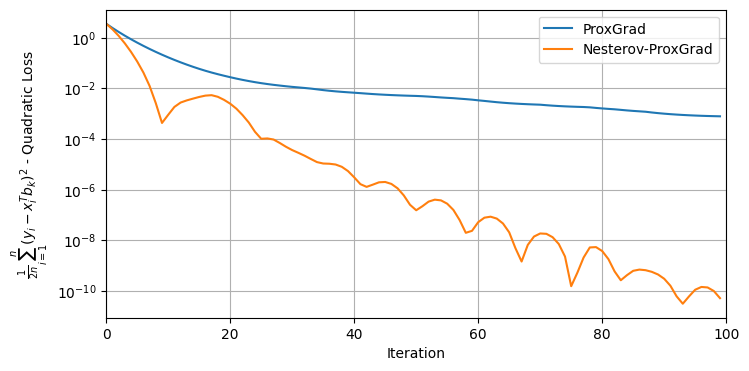

In [13]:
#Escreva código aqui
b0 = np.asmatrix(np.zeros(p)).T
t_final = 100
SlopeB = False
A = 4
L = A * np.max(la.eigvalsh(X.T @ X / X.shape[0]))
lambd = sd*np.sqrt(np.log(p)/n)      

f1 = linear_reg(n,p,SlopeB,X,y,L,lambd,b0,t_final)
f2 = linear_reg_acc(n,p,SlopeB,X,y,L,lambd,b0,t_final)

plt.figure(figsize=(8, 4))
plt.plot(f1[0], label='ProxGrad')
plt.plot(f2[0], label='Nesterov-ProxGrad')
plt.yscale('log')
plt.grid()
plt.xlabel('Iteration')
plt.ylabel('$\\frac{1}{2n}\sum_{i=1}^n(y_i-x_i^Tb_k)^2$')
plt.xlim(0, t_final)
plt.legend()
plt.show()

# Exercício 5:

Refaça os exercícios com $\sigma=1$ e $\sigma=10$. Há alguma diferença quando $\sigma=10$? Tem alguma intuição de porque isso acontece?